In [7]:
from datasets import load_dataset
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib.pyplot as plt

### Download the dataset from hugging face

In [5]:


# 0️⃣ Setup
ROOT    = Path("data/flickr30k")
IMG_DIR = ROOT / "images"
ROOT.mkdir(parents=True, exist_ok=True)
IMG_DIR.mkdir(exist_ok=True)

# 1️⃣ Download & load with HF’s built-in progress bar
ds_all = load_dataset("nlphuji/flickr30k")

# 2️⃣ Build & save metadata.parquet
frames = []
for split_name, ds in ds_all.items():
    frames.append(pd.DataFrame({
        "filename": ds["filename"],
        "caption":  [c[0] for c in ds["caption"]],
        "split":    split_name,
    }))
df = pd.concat(frames, ignore_index=True)
df.to_parquet(ROOT / "metadata.parquet", index=False)

# 3️⃣ Save images with your own progress bars
for split_name, ds in ds_all.items():
    for example in tqdm(ds, desc=f"Writing {split_name}", unit="img"):
        img = example["image"]       # a PIL.Image
        img.save(IMG_DIR / example["filename"])

# 4️⃣ Sanity check
print(f"Saved {len(list(IMG_DIR.glob('*.jpg')))} images into {IMG_DIR}")


Writing test:   0%|          | 0/31014 [00:00<?, ?img/s]

### Sanity check prints

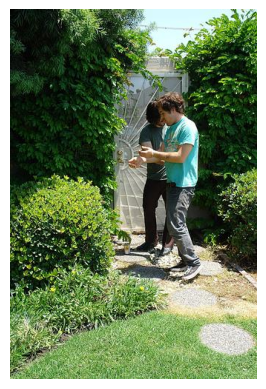

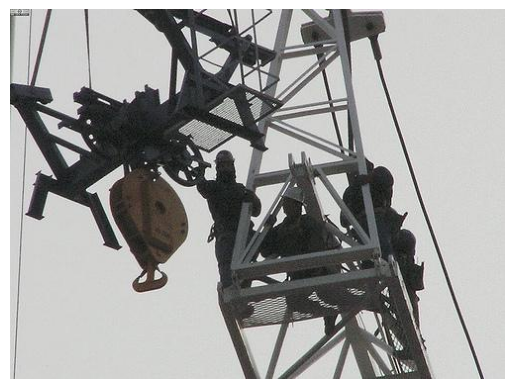

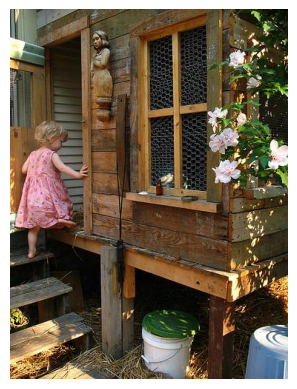

In [9]:

META_PATH = ROOT / "metadata.parquet"

# Load metadata
import pandas as pd
meta_df = pd.read_parquet(META_PATH)

# Show first 3 images
for fname in meta_df["filename"].head(3):
    img = Image.open(IMG_DIR / fname)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [ ]:
# Load metadata
meta_df = pd.read_parquet(Path("data/flickr30k/metadata.parquet"))

# Display the first 3 rows
meta_df.head(3)

,filename,caption,split
0,1000092795.jpg,Two young guys with shaggy hair look at their ...,test
1,10002456.jpg,Several men in hard hats are operating a giant...,test
2,1000268201.jpg,A child in a pink dress is climbing up a set o...,test


In [15]:
# Check each image only comes with one caption (online it had multiple in a list per image)
meta_df["caption"][2]

'A child in a pink dress is climbing up a set of stairs in an entry way.'

In [16]:
# print num entries in split which are test, train
print("Number of entries in each split:")
print(meta_df["split"].value_counts())

Number of entries in each split:
split
test    31014
Name: count, dtype: int64


In [17]:
# check for any missing values
print("Missing values in metadata:")
print(meta_df.isnull().sum())

Missing values in metadata:
filename    0
caption     0
split       0
dtype: int64
